# Diffusion Simulation

Here are few examples of how to use pyDiffusion to perform diffusion simulation by
1. Simple setups
2. Diffusion coefficients data from csv files

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pydiffusion.core import DiffProfile, DiffSystem
from pydiffusion.utils import step
from pydiffusion.simulation import mphSim
from pydiffusion.plot import profileplot, DCplot
from pydiffusion.io import read_csv

## Diffusion simulation by simple setups

A diffusion simualtion requires two inputs:
1. A initial profile (pydiffusion.core.DiffProfile)
2. A diffusion system with well-defined diffusivities (pydiffusion.core.DiffSystem)

Define a diffusion system with constant diffusion coefficients $10^{-14} m^2/s$ within $X = [0, 1]$, and a initial step profile (step at 500 micron, length = 1000 micron).

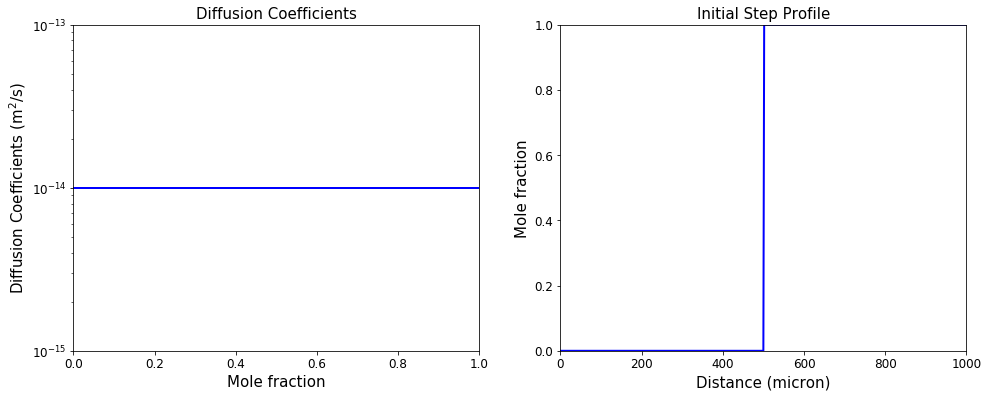

In [2]:
diffsys = DiffSystem(Xr=[0, 1], X=[0, 1], DC=[1e-14, 1e-14])
dis = np.linspace(0, 1000, 501)
profile_init = step(dis, 500, diffsys)

fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
ax1.set_title('Diffusion Coefficients', fontsize=15)
ax2.set_title('Initial Step Profile', fontsize=15)
DCplot(diffsys, ax1)
profileplot(profile_init, ax2)
plt.show()

Simulate the diffusion process for 200 hours.

Simulation Complete


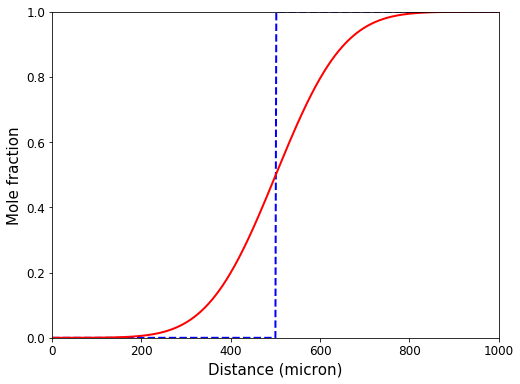

In [3]:
time = 200 * 3600
profile_final = mphSim(profile_init, diffsys, time)

ax = plt.figure(figsize=(8, 6)).add_subplot(111)
profileplot(profile_init, ax, ls='--')
profileplot(profile_final, ax, c='r')
plt.show()

## Diffusion simulation in Ni-Mo system by data inputs

Simulation Complete


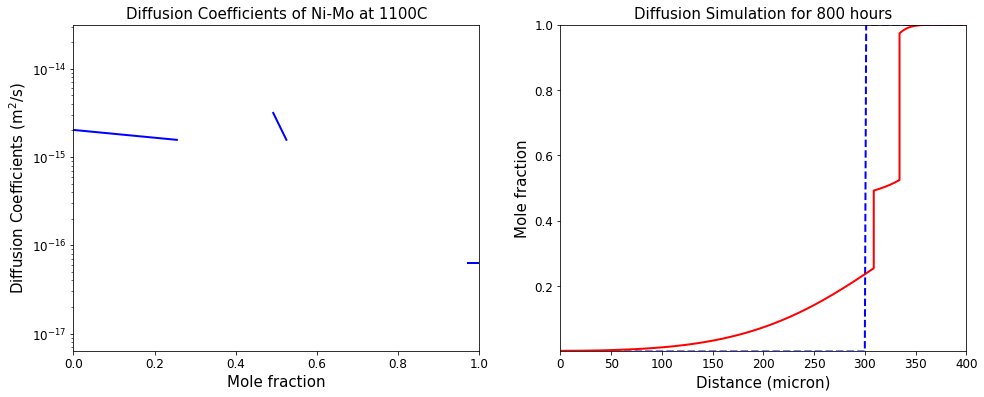

In [4]:
_, diffsys_NiMo = read_csv('NiMo.csv', [0, 1])
dis = np.linspace(0, 400, 301)
profile_NiMo_init = step(dis, 300, diffsys_NiMo)
profile_NiMo = mphSim(profile_NiMo_init, diffsys_NiMo, 800*3600)

fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
ax1.set_title('Diffusion Coefficients of Ni-Mo at 1100C', fontsize=15)
ax2.set_title('Diffusion Simulation for 800 hours', fontsize=15)
DCplot(diffsys_NiMo, ax1)
profileplot(profile_NiMo_init, ax2, ls='--')
profileplot(profile_NiMo, ax2, c='r')
plt.show()